In [1]:
import cdfjoin
import natjoin
import cdfsampler
from loadimdb import table_pairs
from loadimdb import joined_table_indices
from datetime import datetime
from scipy.special import comb
from scipy import linspace
import random
import timeit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_intermediate(tables, x, size = True):
    values = []
    random_threshold = random.uniform(0,1)
    for threshold in x:
        result = cdfjoin.cdfjoin(tables, threshold, random_threshold)
        if size:
            values.append([len(result[0][0]), len(result[1][0])])
        else:
            values.append([result[0][1], result[1][1]])
    return values

In [3]:
def outputsize_plot(tables):
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.ylabel('Output Size')
    plt.xlabel('Sampling Probability')
    x = linspace(0, 1, 100)
    y = plot_intermediate(tables, x, True)
    y1 = [i for [i, j] in y]
    y2 = [j for [i, j] in y]
    plt.plot(x, y1, label = 'n = Hashed Sampling')
    plt.plot(x, y2, label = 'n = Random Sampling')
    plt.legend(loc='best')

In [4]:
def runtime_plot(tables):
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.ylabel('Runtime')
    plt.xlabel('Sampling Probability')
    x = linspace(0, 1, 100)
    y = plot_intermediate(tables, x, False)
    y1 = [i for [i, j] in y]
    y2 = [j for [i, j] in y]
    plt.plot(x, y1, label = 'n = Hashed Sampling')
    plt.plot(x, y2, label = 'n = Random Sampling')
    plt.legend(loc='best')

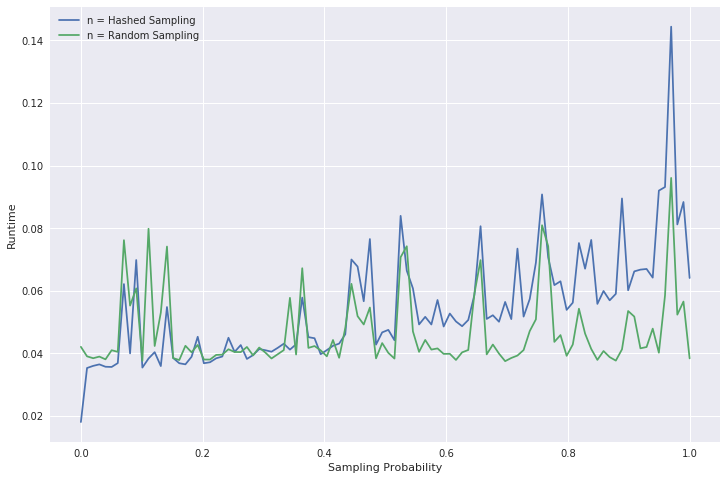

In [5]:
runtime_plot(table_pairs[12])

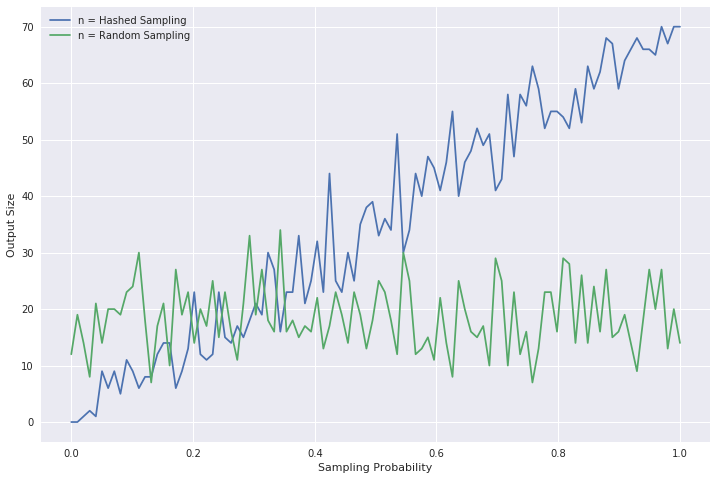

In [6]:
outputsize_plot(table_pairs[12])